# Deutsch Algorithm
Attention: This Jupyter notebook is a google colab session. If you are using your local Python, and you've already installed `qiskit` you don't need to run the following cell.

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_ibm_runtime
!pip install qiskit_aer

In [2]:
import numpy as np
import pandas as pd
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *

In [3]:
# Function for plotting the quantum circuit
def qplot(qc):
    return qc.draw('mpl', scale=0.8, initial_state= True, fold=-1)

def latex(quantum_state):
  return Statevector(quantum_state).draw('latex')

# Uploading the oracle from Github repo
For importing Constant or Balanced Oracles for your notebooks, you can first clone the following repo and use it for Deutsch Algorithm

> in the google colab run the following

`!git clone https://github.com/emad-boosari/Quantum-Algorithms.git`

> In your local PC, you can run

`?`



In [8]:
from oracles import DeutschOracle

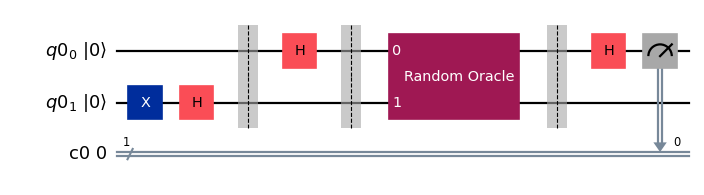

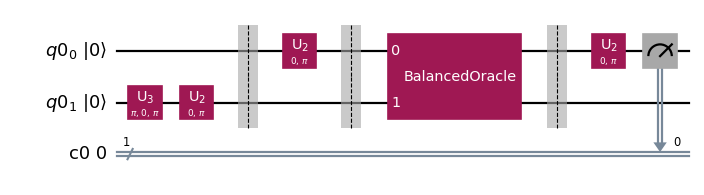

In [9]:
q = QuantumRegister(2) # Creating a quantum Register with two qubits
c = ClassicalRegister(1) # Creating one bit for handling the measurement result
qc = QuantumCircuit(q,c) # building the quantum Circuit

# prepration of state |-> in order to use phaseKickbacked effect (Ancila qubit)
qc.x(q[1])
qc.h(q[1])
qc.barrier()

# Make a superposition of main qubit
qc.h(q[0])
qc.barrier()

# Apply a random Oracle to the quantum Circuit
oracle = DeutschOracle()
balanced_circuit = oracle.random()
qc.append(balanced_circuit,q)
qc.barrier()

# Apply the final Hadamard gate
qc.h(0)

# Mesurement of the QuantumCircuit
qc.measure(q[0],c)

display(qplot(qc), qplot(qc.decompose()))

In [10]:
from qiskit import transpile
from qiskit_aer import AerSimulator

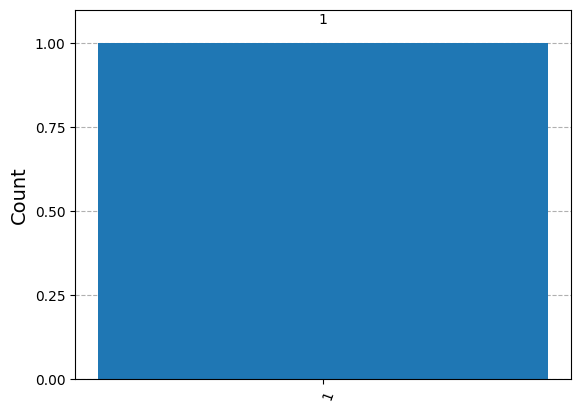

In [12]:
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots= 1)
result = job.result()
count = result.get_counts()
plot_histogram(count)

# Using the Fake Athens Backends to run this algorithm on a real device

In [13]:
from qiskit_ibm_runtime.fake_provider import  FakeAthens
backend = FakeAthens()

<ipython-input-13-792b56f64d31>:2: DeprecationWarning: V1 fake backends are deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use V2 fake backends instead.
  backend = FakeAthens()


## Evaluating the Backends

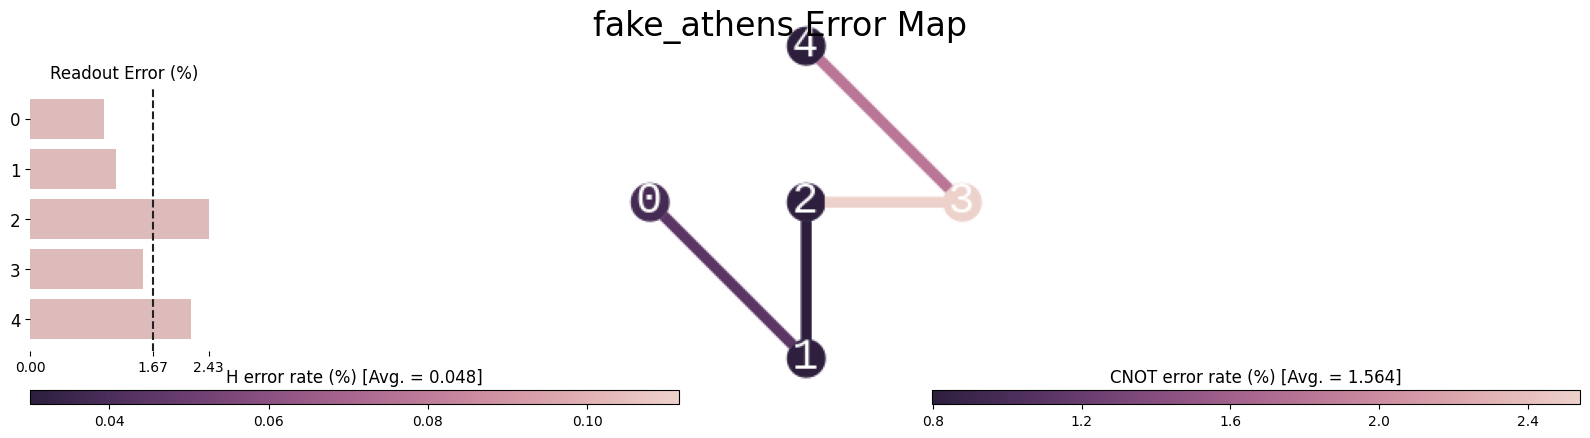

In [14]:
plot_error_map(backend, figsize=(20, 5))

In [15]:
# Number of qubits in this configuration
backend.configuration().n_qubits

5

In [16]:
props = backend.properties()

In [17]:
for i in range(backend.configuration().n_qubits):
  print(f'For qubit {i}')
  print('------------------------------------------------------------------------------------')
  df = pd.DataFrame(props.qubit_property(i), index=['Value', 'Timestamp']).T
  print(df)


For qubit 0
------------------------------------------------------------------------------------
                              Value                  Timestamp
T1                         0.000063  2021-03-15 00:15:03-04:00
T2                         0.000112  2021-03-15 00:16:08-04:00
frequency         5175383639.513607  2021-03-15 14:10:39-04:00
anharmonicity      -336102370.55834  2021-03-15 14:10:39-04:00
readout_error                0.0101  2021-03-15 00:14:02-04:00
prob_meas0_prep1              0.018  2021-03-15 00:14:02-04:00
prob_meas1_prep0             0.0022  2021-03-15 00:14:02-04:00
readout_length             0.000003  2021-03-15 00:14:02-04:00
For qubit 1
------------------------------------------------------------------------------------
                              Value                  Timestamp
T1                         0.000073  2021-03-15 00:15:03-04:00
T2                         0.000127  2021-03-15 00:17:38-04:00
frequency         5267216864.382969  2021-03-15 14

In [ ]:
for i in range(backend.configuration().n_qubits):
  print(props.gate_length('x',i))

3.5555555555555554e-08
3.5555555555555554e-08
3.5555555555555554e-08
3.5555555555555554e-08
3.5555555555555554e-08


## Transpiling by using the FakeAthens backends

<ipython-input-156-15002d9969f6>:1: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_athens ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_circuit = transpile(qc, backend)


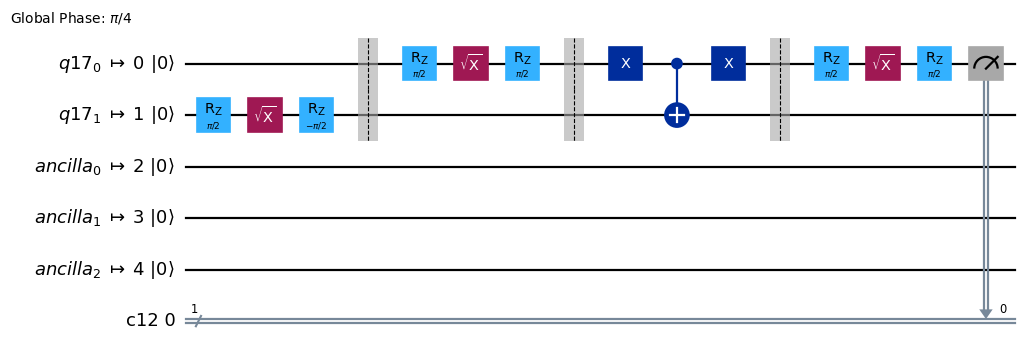

In [ ]:
compiled_circuit = transpile(qc, backend)
qplot(compiled_circuit)

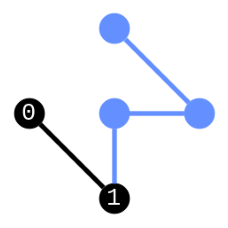

In [ ]:
plot_circuit_layout(compiled_circuit, backend)

## Manual Compilation by Choosing the arbitrary Qubits

<ipython-input-154-979c34ebbe5a>:1: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_athens ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  qc_manual_compiled = transpile(qc,backend,initial_layout=[3,4])


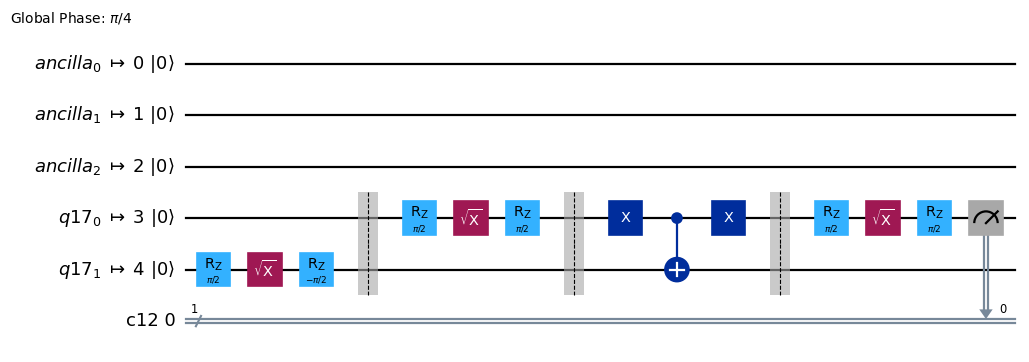

In [ ]:
qc_manual_compiled = transpile(qc,backend,initial_layout=[3,4])
qplot(qc_manual_compiled)

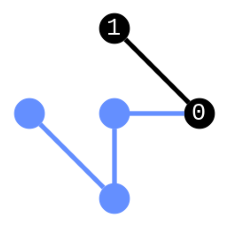

In [ ]:
plot_circuit_layout(qc_manual_compiled, backend)

# Difference between these two compilations `Depth`

In [ ]:
print('Depth of the Authomatic compilation: ')
compiled_circuit.depth()

Depth of the Authomatic compilation: 


13

In [ ]:
print('Depth of the Manual compilation: ')
qc_manual_compiled.depth()

Depth of the Manual compilation: 


13